<a href="https://colab.research.google.com/github/debadattasarangi/ML/blob/main/OLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
ola=pd.read_csv("ola_driver_scaler.csv")
ola.head(20)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


# Define Problem Statement and perform Exploratory Data Analysis

In [ ]:
#Data set has 19104 records
# It has int ,object(string) , float type of features
# 3 feature contains null values(missing values)
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
# stastical description of data, which contains min , max ,mean , median .... of all the features
ola.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
print("Total Record->",ola.shape[0],"  Total feature->",ola.shape[1])

Total Record-> 19104   Total feature-> 14


## MissingValue

In [ ]:
# age , gender ,lasrworkingdate contains null values
ola.isna().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

## conversion of categorical attributes

In [ ]:
#Converting Reporting date,LastWorkingDate,DateofJoiniing data to date data type
ola['ReportingDate']=pd.to_datetime(ola['MMM-YY'],infer_datetime_format=True)
ola['Dateofjoining']=pd.to_datetime(ola['Dateofjoining'],infer_datetime_format=True)
ola['LastWorkingDate']=pd.to_datetime(ola['LastWorkingDate'],infer_datetime_format=True)
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            19104 non-null  int64         
 1   MMM-YY                19104 non-null  object        
 2   Driver_ID             19104 non-null  int64         
 3   Age                   19043 non-null  float64       
 4   Gender                19052 non-null  float64       
 5   City                  19104 non-null  object        
 6   Education_Level       19104 non-null  int64         
 7   Income                19104 non-null  int64         
 8   Dateofjoining         19104 non-null  datetime64[ns]
 9   LastWorkingDate       1616 non-null   datetime64[ns]
 10  Joining Designation   19104 non-null  int64         
 11  Grade                 19104 non-null  int64         
 12  Total Business Value  19104 non-null  int64         
 13  Quarterly Rating

In [ ]:
ola.head(5)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingDate
0,0,01/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,2019-01-01
1,1,02/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2019-02-01
2,2,03/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,2019-03-01
3,3,11/01/20,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,2020-11-01
4,4,12/01/20,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,2020-12-01


In [ ]:
#Removing Unnamed :0 Column and MMM-YY Column
ola.drop(['Unnamed: 0', 'MMM-YY'],inplace=True,axis=1)

In [ ]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             19104 non-null  int64         
 1   Age                   19043 non-null  float64       
 2   Gender                19052 non-null  float64       
 3   City                  19104 non-null  object        
 4   Education_Level       19104 non-null  int64         
 5   Income                19104 non-null  int64         
 6   Dateofjoining         19104 non-null  datetime64[ns]
 7   LastWorkingDate       1616 non-null   datetime64[ns]
 8   Joining Designation   19104 non-null  int64         
 9   Grade                 19104 non-null  int64         
 10  Total Business Value  19104 non-null  int64         
 11  Quarterly Rating      19104 non-null  int64         
 12  ReportingDate         19104 non-null  datetime64[ns]
dtypes: datetime64[ns

In [ ]:
# unique values with respect to different features
# 2382 drivers colaborate with ola
ola.nunique()

Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
ReportingDate              24
dtype: int64

In [ ]:
column_name=ola.columns
print(column_name)

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Dateofjoining', 'LastWorkingDate', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating', 'ReportingDate'],
      dtype='object')


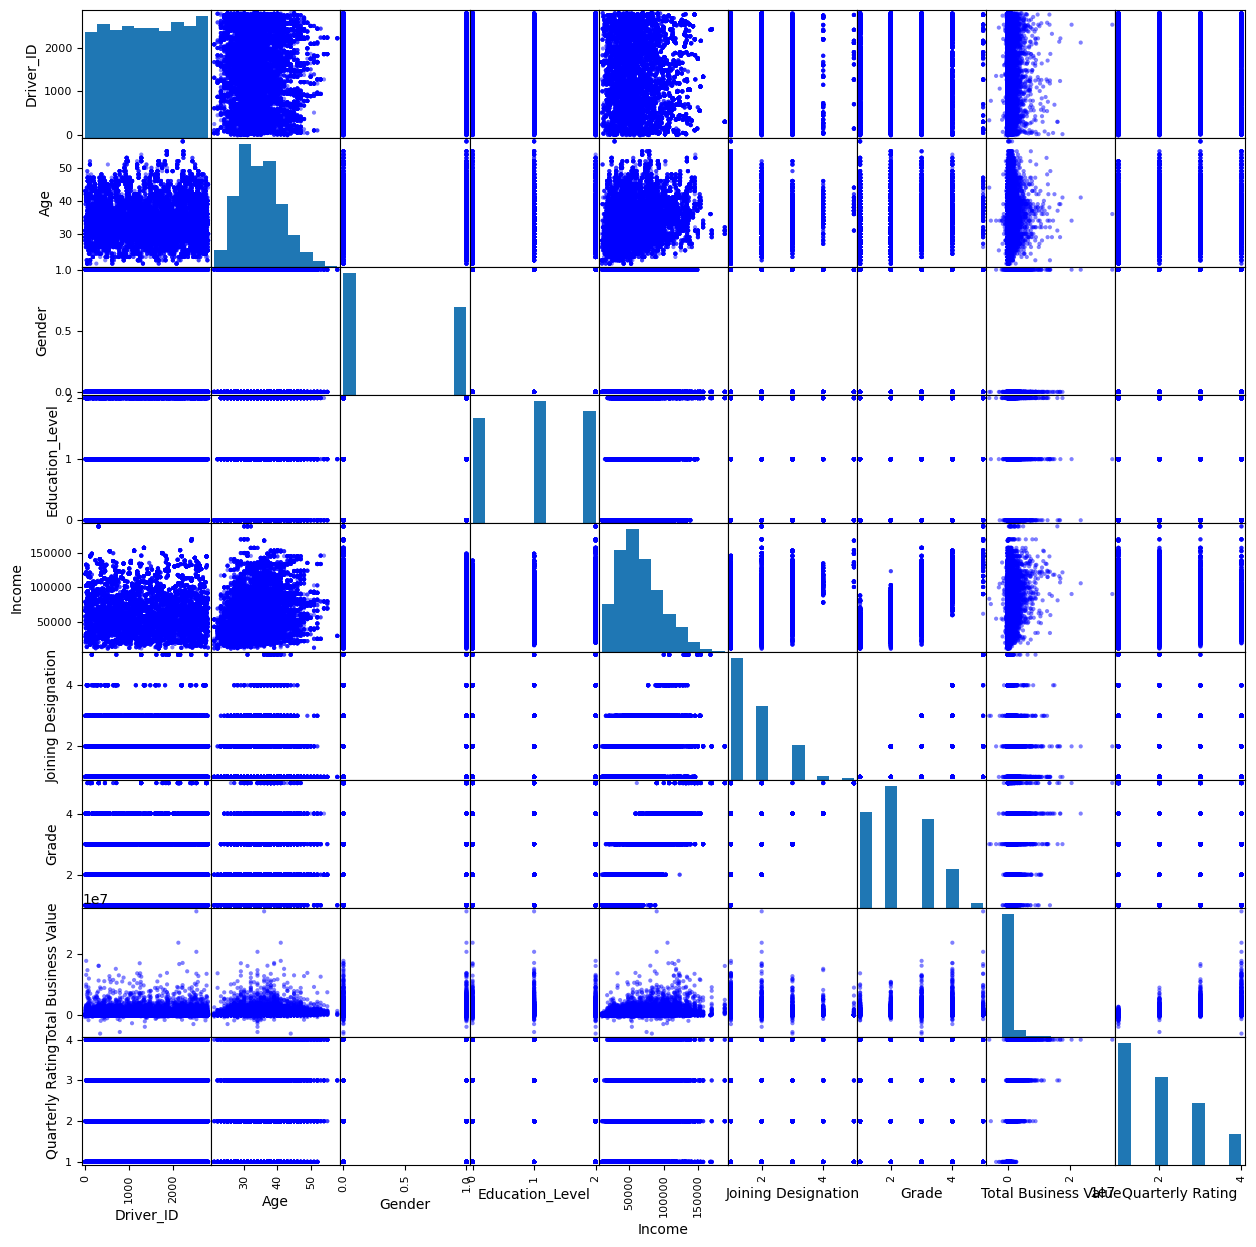

In [ ]:
# Distributions of all the features with respect to different features
# Most of the drivers belongs to 20-40 age (count of male driver > count of female driver)
from pandas.plotting import scatter_matrix
scatter_matrix(ola, figsize= (15,15), diagonal='hist', color = 'b')
plt.pyplot.show()

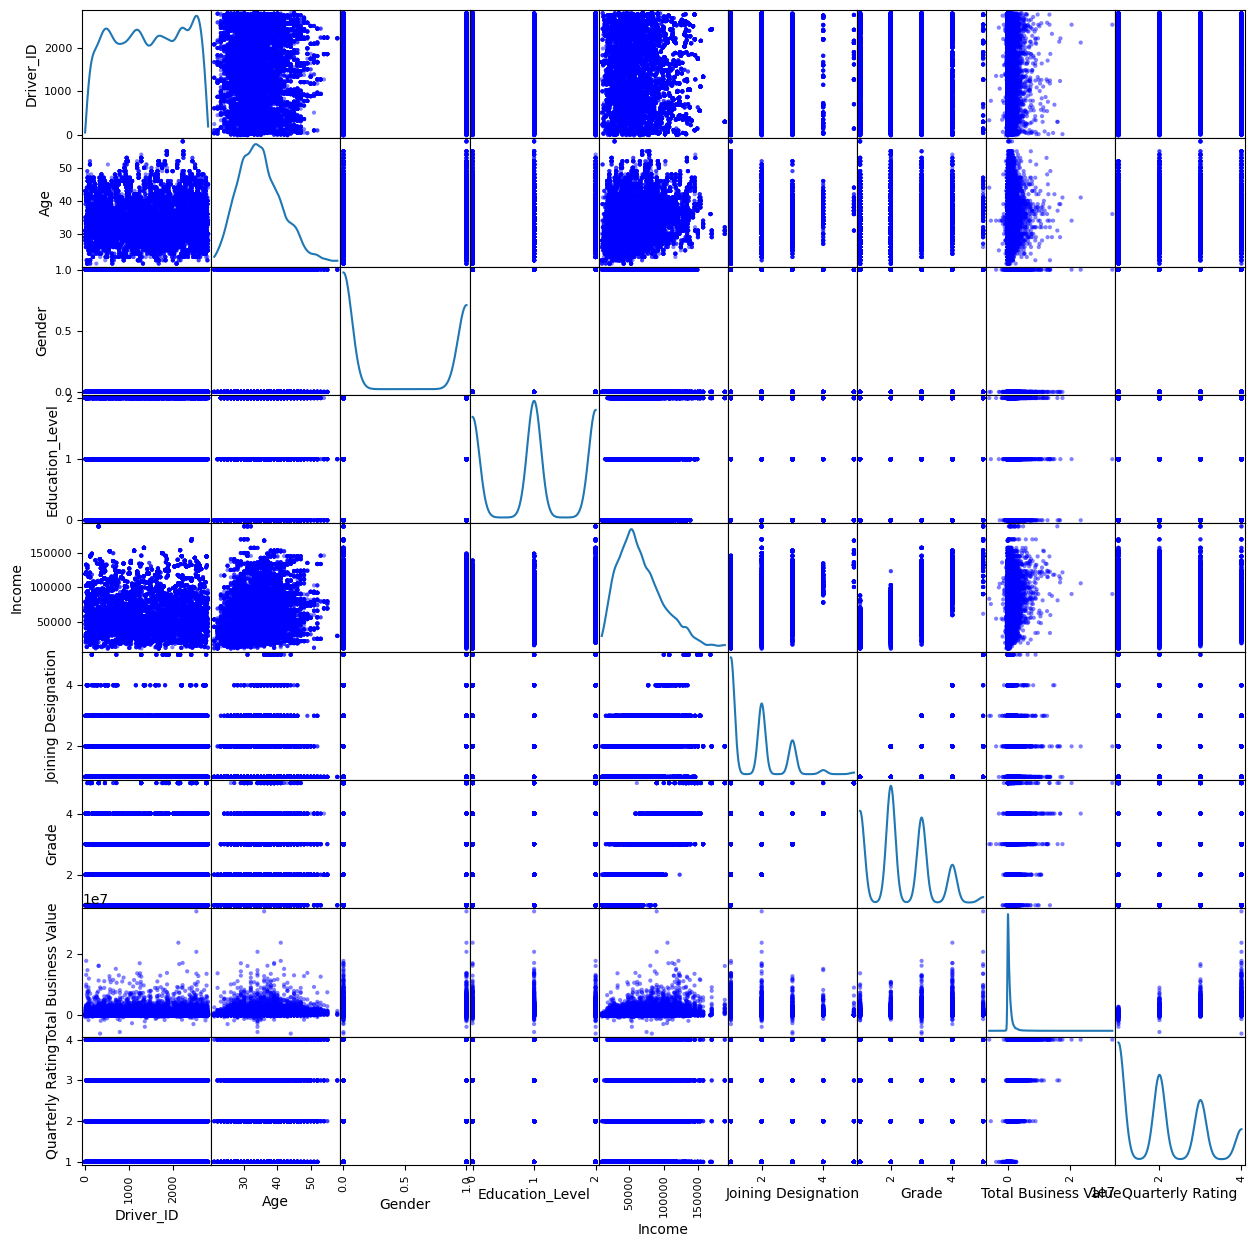

In [ ]:
scatter_matrix(ola, figsize= (15,15), diagonal='kde', color = 'b')
plt.pyplot.show()

In [ ]:
numericalColumnName=['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation', 'Grade','Total Business Value', 'Quarterly Rating']

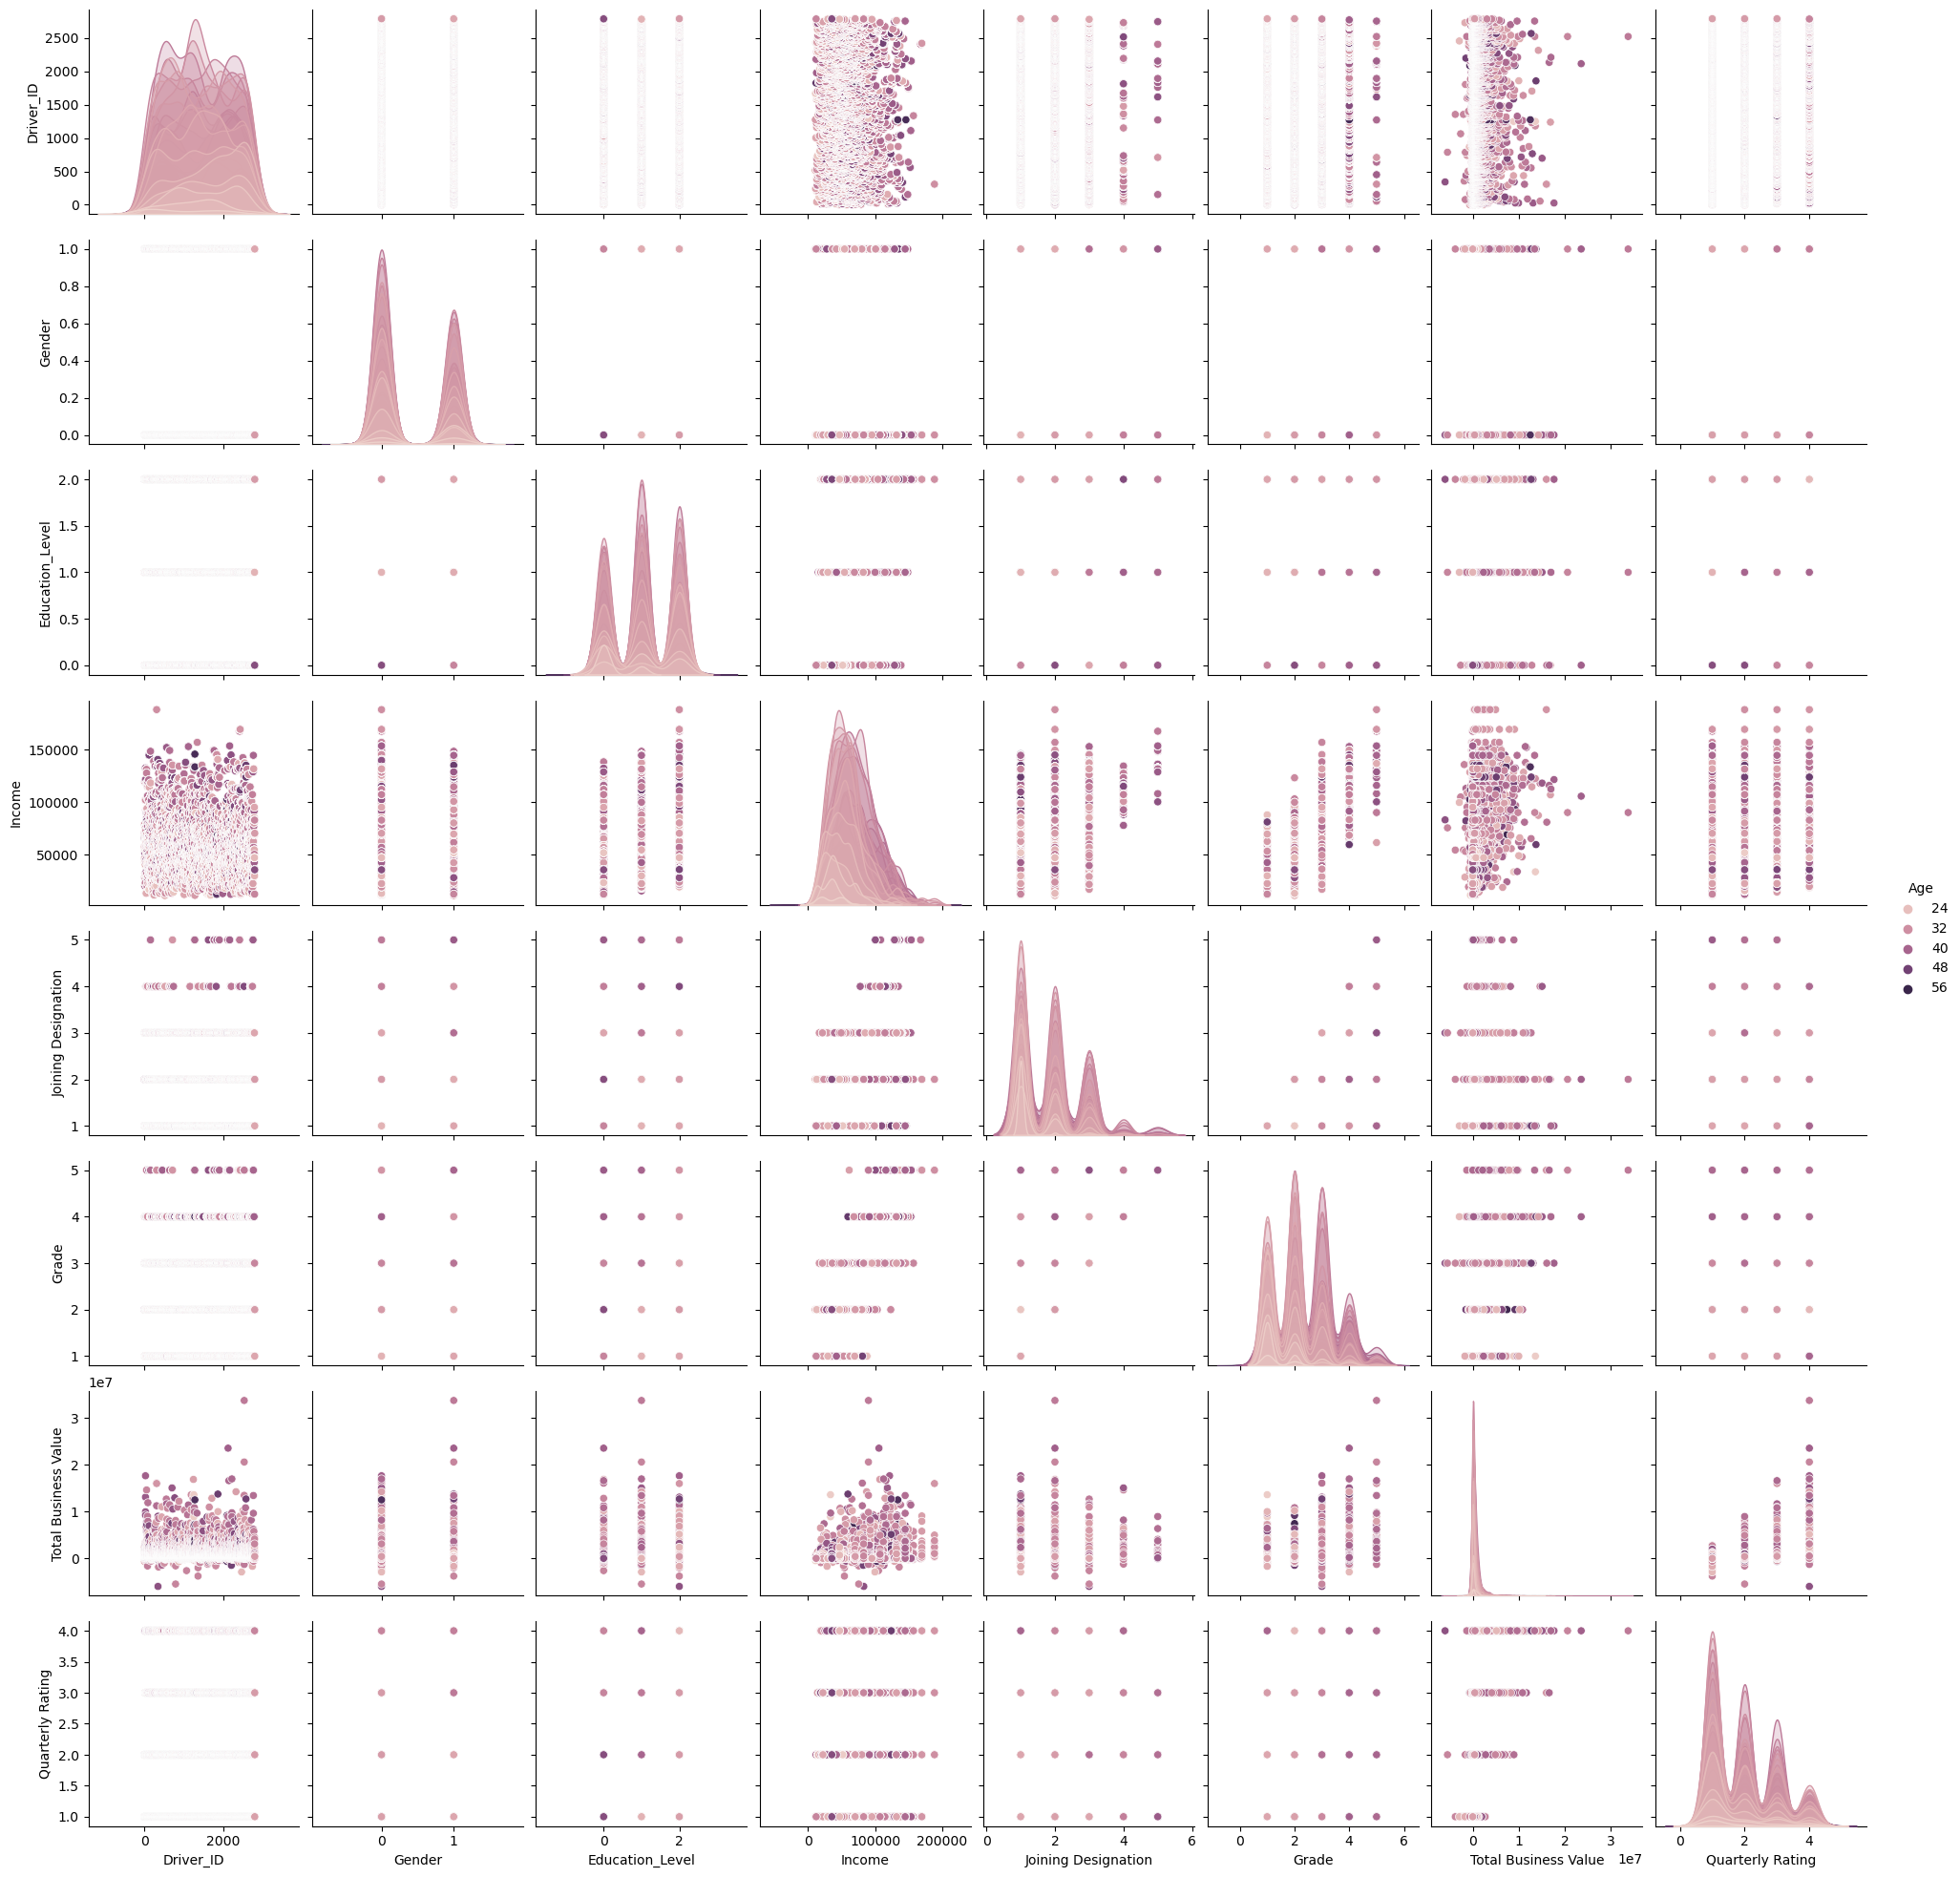

In [ ]:
sns.pairplot(ola,hue="Age")

C:\Users\debad\AppData\Local\Temp\ipykernel_5384\537605302.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a = ola[numericalColumnName[0]],hist=True,kde=False)


<Axes: xlabel='Driver_ID'>

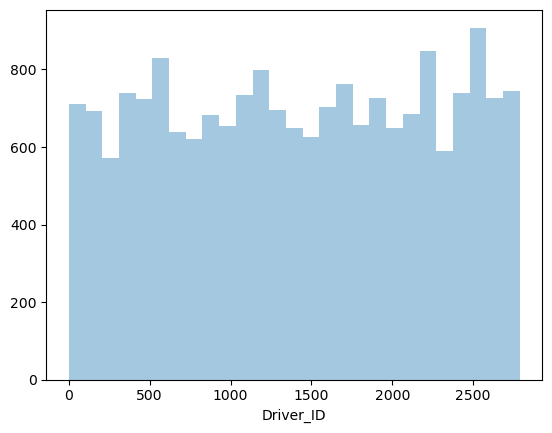

In [ ]:
sns.distplot( a = ola[numericalColumnName[0]],hist=True,kde=False)

C:\Users\debad\AppData\Local\Temp\ipykernel_5384\3809610254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a = ola[numericalColumnName[1]],hist=True,kde=False)


<Axes: xlabel='Age'>

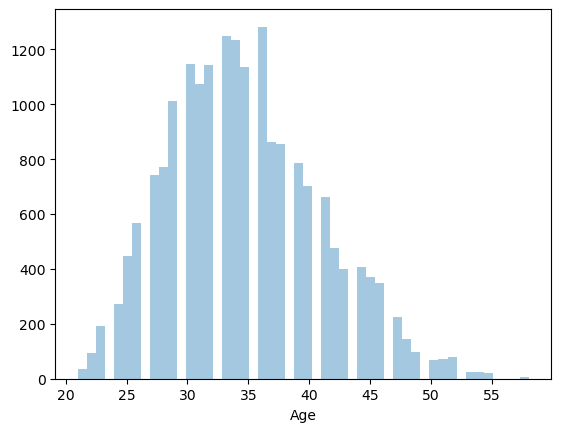

In [ ]:
# 25-40 age group drivers
sns.distplot( a = ola[numericalColumnName[1]],hist=True,kde=False)

C:\Users\debad\AppData\Local\Temp\ipykernel_5384\2158893341.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a = ola[numericalColumnName[2]],hist=True,kde=False)


<Axes: xlabel='Gender'>

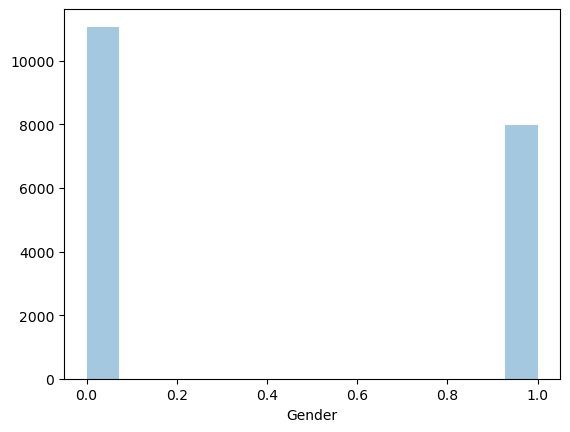

In [ ]:
# male count> female count
sns.distplot( a = ola[numericalColumnName[2]],hist=True,kde=False)

C:\Users\debad\AppData\Local\Temp\ipykernel_5384\553097716.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a = ola[numericalColumnName[3]],hist=True,kde=False)


<Axes: xlabel='Education_Level'>

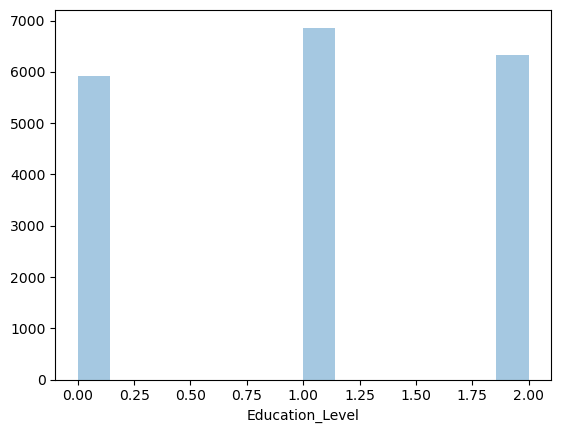

In [ ]:
#more drivers from 1 education group
sns.distplot( a = ola[numericalColumnName[3]],hist=True,kde=False)

C:\Users\debad\AppData\Local\Temp\ipykernel_5384\2985187380.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a = ola[numericalColumnName[4]],hist=True,kde=False)


<Axes: xlabel='Income'>

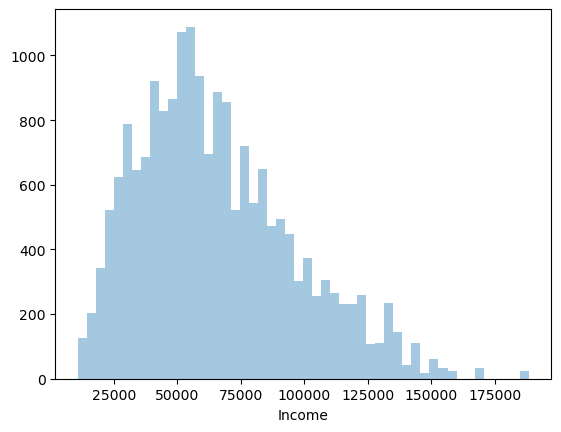

In [ ]:
# most of the drivers income is between 1lakh very less people earns more than 1lakh
sns.distplot( a = ola[numericalColumnName[4]],hist=True,kde=False)

C:\Users\debad\AppData\Local\Temp\ipykernel_5384\496476760.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a = ola[numericalColumnName[5]],hist=True,kde=False)


<Axes: xlabel='Joining Designation'>

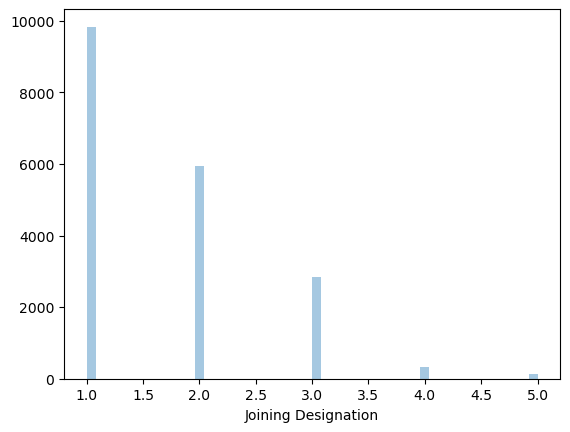

In [ ]:
# very less driver have 3,4,5 designations
sns.distplot( a = ola[numericalColumnName[5]],hist=True,kde=False)

C:\Users\debad\AppData\Local\Temp\ipykernel_5384\12704593.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a = ola[numericalColumnName[6]],hist=True,kde=False)


<Axes: xlabel='Grade'>

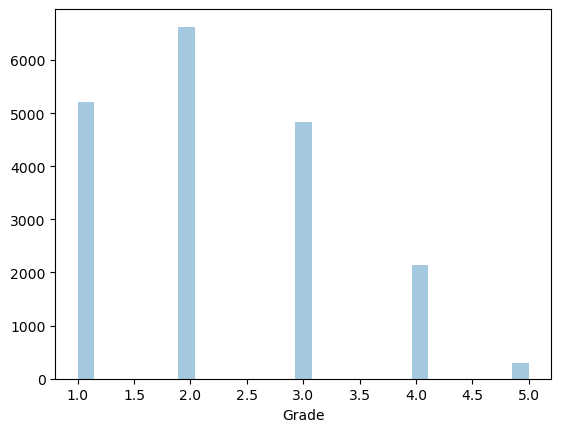

In [ ]:
# most drivers get 1,2,3 grade at the time of joining
sns.distplot( a = ola[numericalColumnName[6]],hist=True,kde=False)

C:\Users\debad\AppData\Local\Temp\ipykernel_5384\1097722174.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a = ola[numericalColumnName[7]],hist=True,kde=False)


<Axes: xlabel='Total Business Value'>

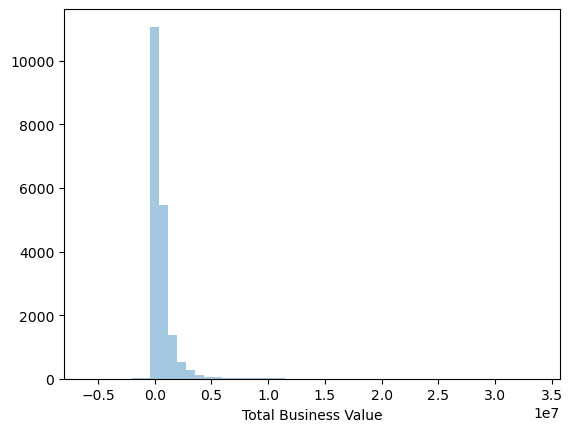

In [ ]:
sns.distplot( a = ola[numericalColumnName[7]],hist=True,kde=False)

C:\Users\debad\AppData\Local\Temp\ipykernel_5384\3163125068.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a = ola[numericalColumnName[8]],hist=True,kde=False)


<Axes: xlabel='Quarterly Rating'>

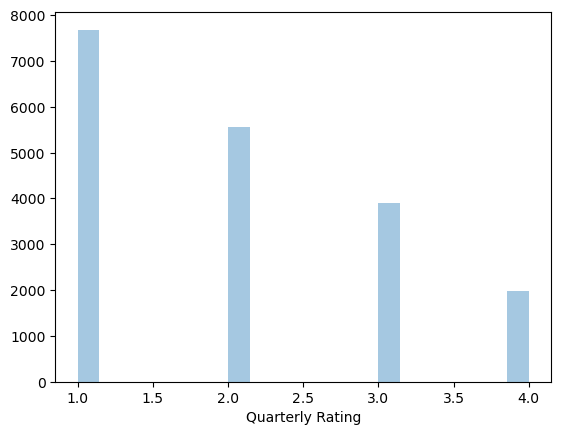

In [ ]:
# very less people gets good rating quartely
sns.distplot( a = ola[numericalColumnName[8]],hist=True,kde=False)

In [ ]:
ola.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Dateofjoining', 'LastWorkingDate', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating', 'ReportingDate'],
      dtype='object')

In [ ]:

ola['City'].value_counts()

C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: City, dtype: int64

<Axes: xlabel='City', ylabel='Age'>

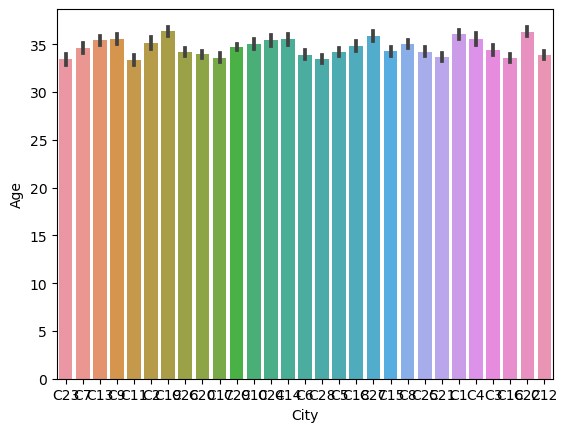

In [ ]:
sns.barplot(ola,x='City',y='Age')

<Axes: xlabel='City', ylabel='count'>

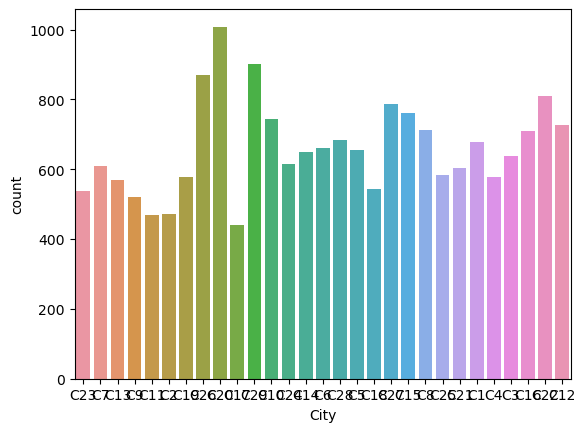

In [ ]:
sns.countplot(ola, x="City")

<Axes: xlabel='LastWorkingDate', ylabel='count'>

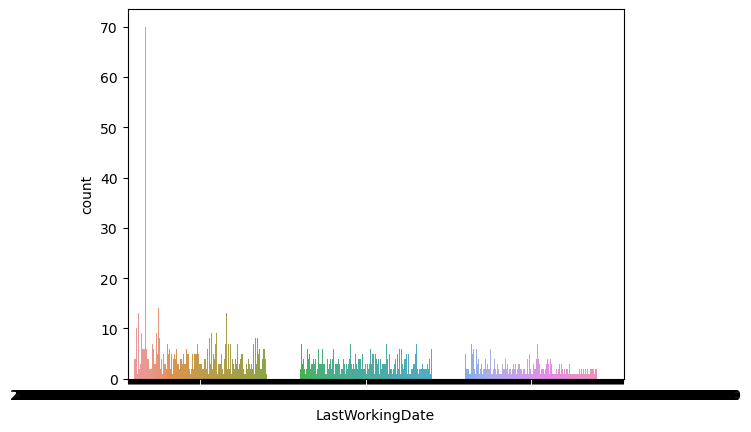

In [ ]:
sns.countplot(ola, x="LastWorkingDate")

In [ ]:
numericalColumnName

['Driver_ID',
 'Age',
 'Gender',
 'Education_Level',
 'Income',
 'Joining Designation',
 'Grade',
 'Total Business Value',
 'Quarterly Rating']

<Axes: >

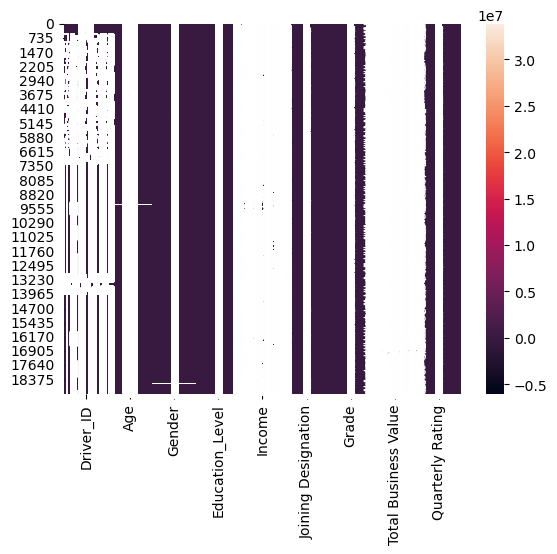

In [ ]:
sns.heatmap(ola[['Driver_ID',
 'Age',
 'Gender',
 'Education_Level',
 'Income',
 'Joining Designation',
 'Grade',
 'Total Business Value',
 'Quarterly Rating']],annot=True)

<Axes: xlabel='Age', ylabel='Quarterly Rating'>

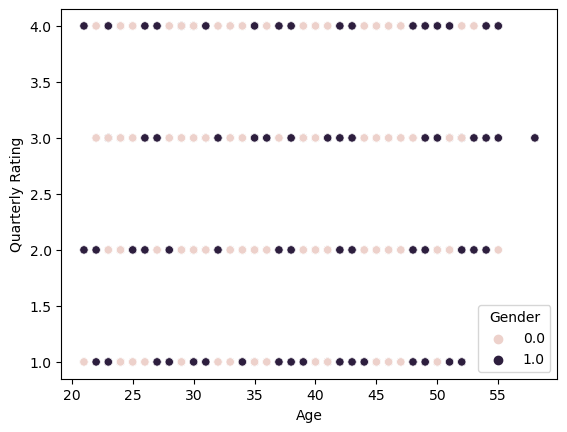

In [ ]:
sns.scatterplot(data=ola, x="Age", y="Quarterly Rating", hue="Gender")

<Axes: xlabel='City', ylabel='Quarterly Rating'>

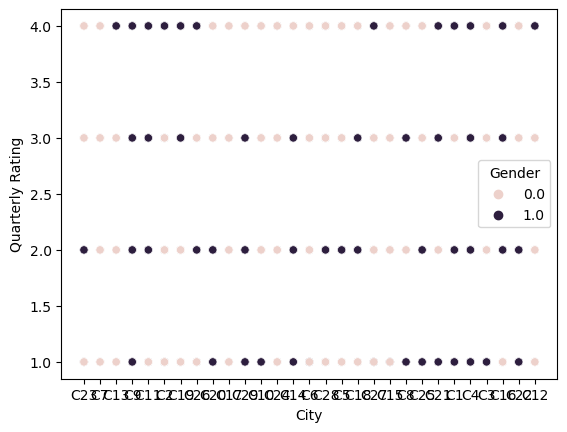

In [ ]:
sns.scatterplot(data=ola, x="City", y="Quarterly Rating", hue="Gender")

<Axes: xlabel='Education_Level', ylabel='Quarterly Rating'>

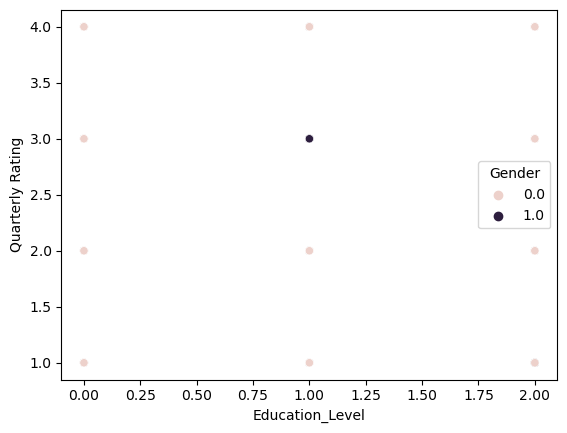

In [ ]:
sns.scatterplot(data=ola, x="Education_Level", y="Quarterly Rating", hue="Gender")

<Axes: xlabel='Income', ylabel='Quarterly Rating'>

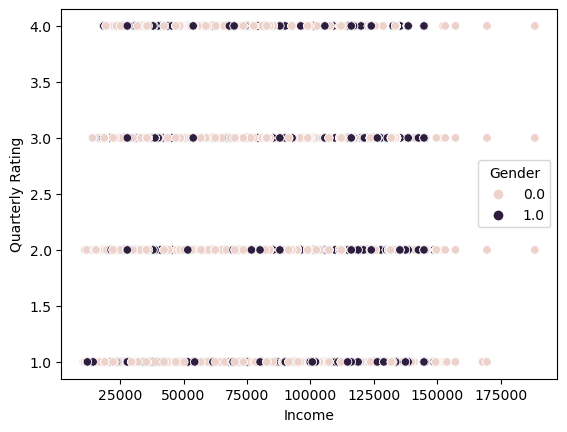

In [ ]:
sns.scatterplot(data=ola, x="Income", y="Quarterly Rating", hue="Gender")

<Axes: xlabel='Joining Designation', ylabel='Quarterly Rating'>

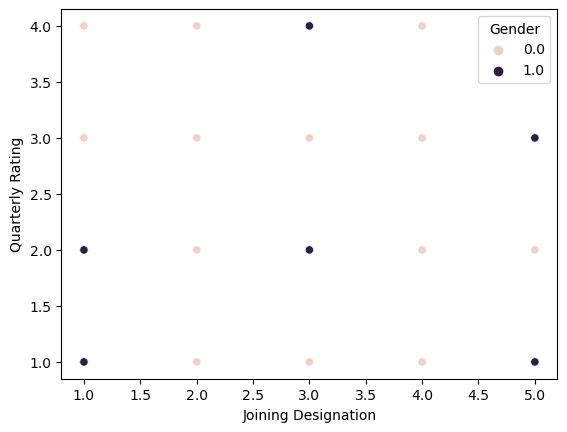

In [ ]:
sns.scatterplot(data=ola, x="Joining Designation", y="Quarterly Rating", hue="Gender")

<Axes: xlabel='Grade', ylabel='Quarterly Rating'>

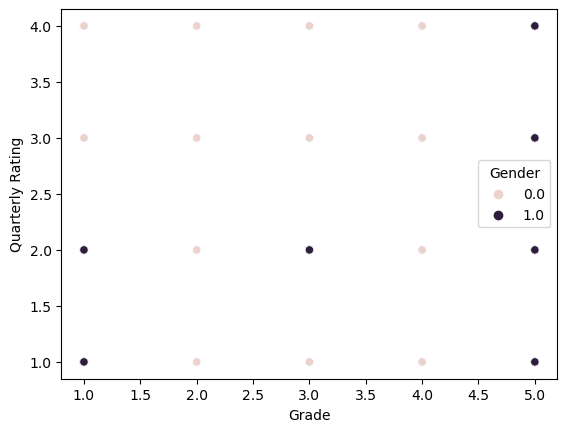

In [ ]:
sns.scatterplot(data=ola, x="Grade", y="Quarterly Rating", hue="Gender")

<Axes: xlabel='Total Business Value', ylabel='Quarterly Rating'>

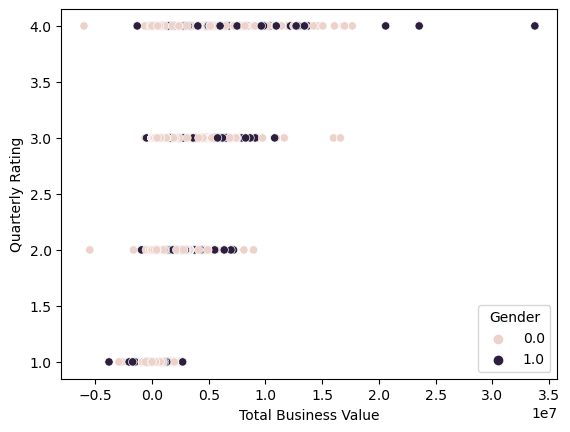

In [ ]:
sns.scatterplot(data=ola, x="Total Business Value", y="Quarterly Rating", hue="Gender")

<Axes: xlabel='Age', ylabel='Income'>

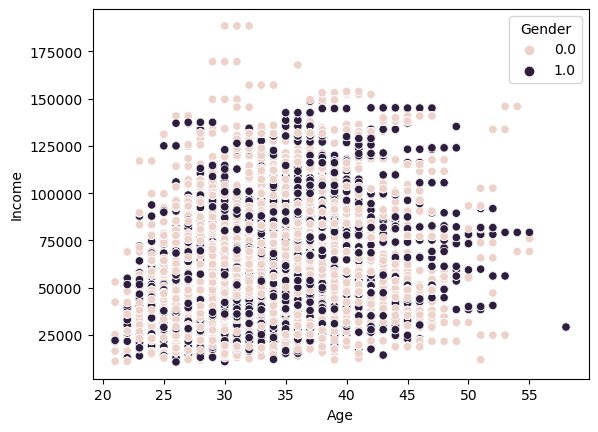

In [ ]:
# some young people earniig >140000, ages between 25-35
sns.scatterplot(data=ola, x="Age", y="Income", hue="Gender")

<Axes: xlabel='Gender', ylabel='Income'>

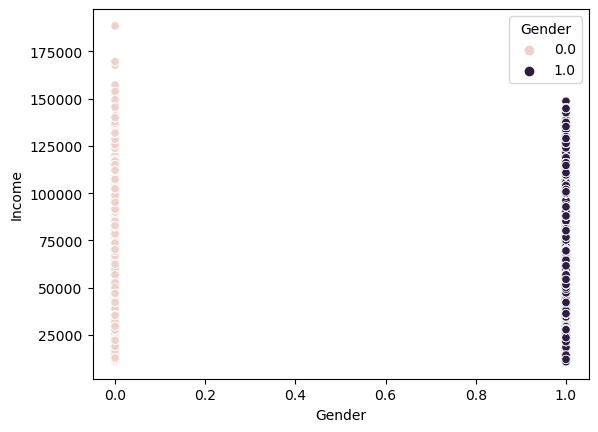

In [ ]:
# males earning more as compare to female
sns.scatterplot(data=ola, x="Gender", y="Income", hue="Gender")

<Axes: xlabel='City', ylabel='Income'>

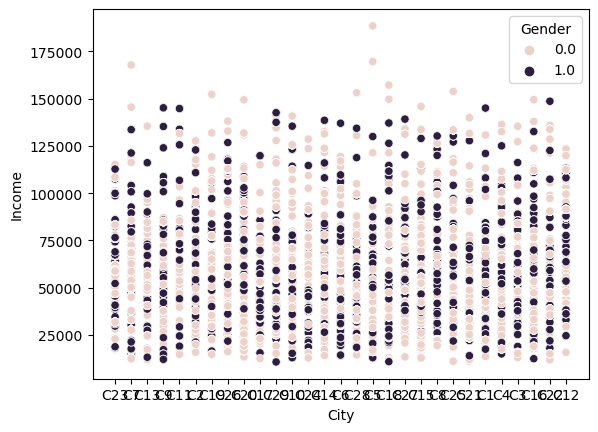

In [ ]:
sns.scatterplot(data=ola, x="City", y="Income", hue="Gender")

<Axes: xlabel='Education_Level', ylabel='Income'>

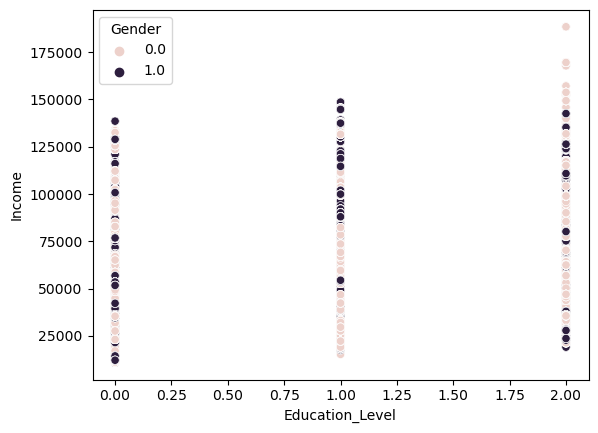

In [ ]:
# those who is earning morethan 1.5laks they belongs to 2nd education level
sns.scatterplot(data=ola, x="Education_Level", y="Income", hue="Gender")

<Axes: xlabel='Joining Designation', ylabel='Income'>

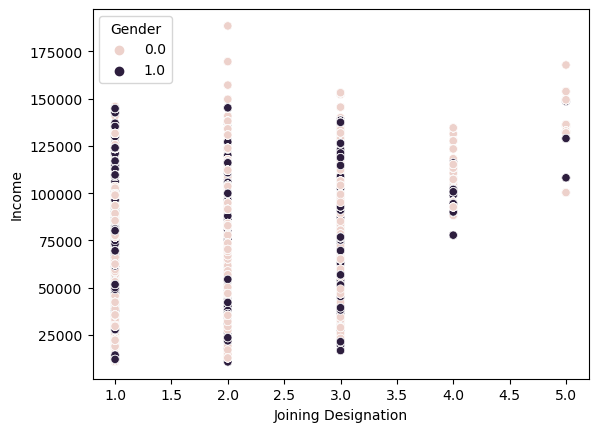

In [ ]:
sns.scatterplot(data=ola, x="Joining Designation", y="Income", hue="Gender")

<Axes: xlabel='Grade', ylabel='Income'>

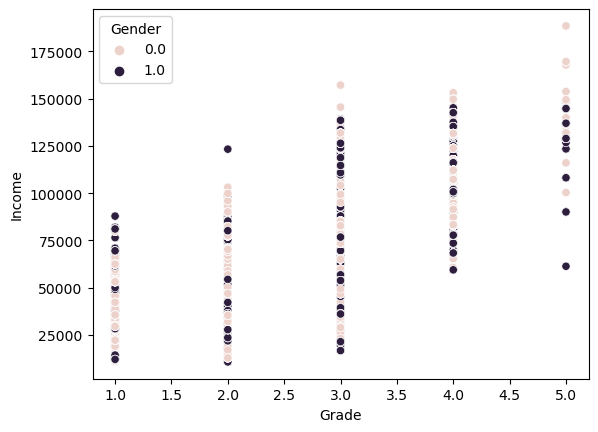

In [ ]:
# if drivers grade increasses earning also increases
sns.scatterplot(data=ola, x="Grade", y="Income", hue="Gender")

<Axes: xlabel='Total Business Value', ylabel='Income'>

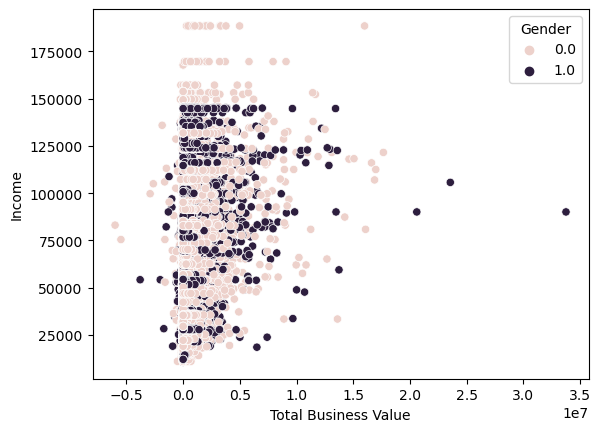

In [ ]:
sns.scatterplot(data=ola, x="Total Business Value", y="Income", hue="Gender")

<Axes: xlabel='Quarterly Rating', ylabel='Income'>

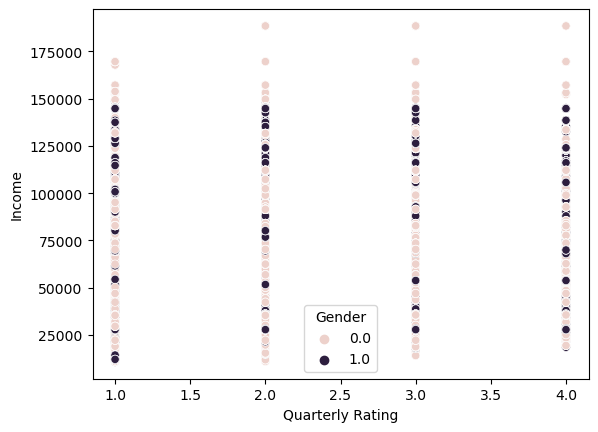

In [ ]:
sns.scatterplot(data=ola, x="Quarterly Rating", y="Income", hue="Gender")

<Axes: >

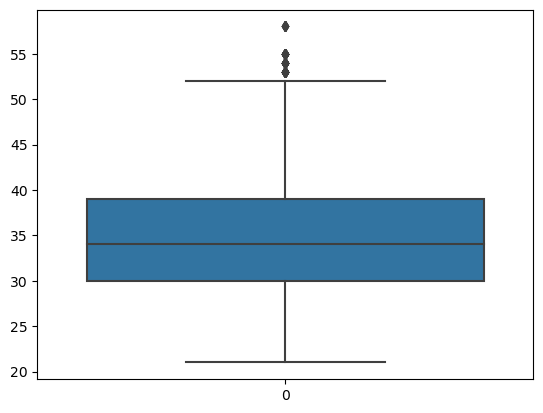

In [ ]:
# age have outliers
sns.boxplot(data=ola['Age'])

<Axes: >

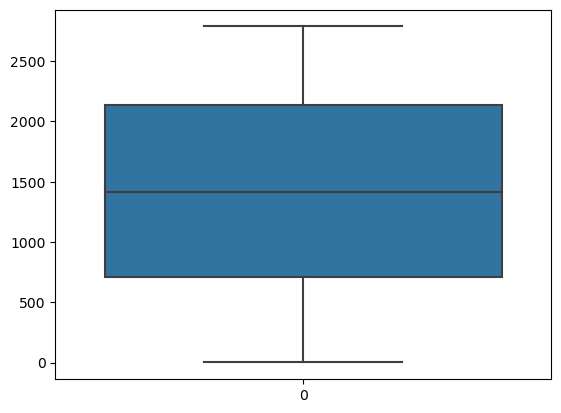

In [ ]:
sns.boxplot(data=ola['Driver_ID'])

<Axes: >

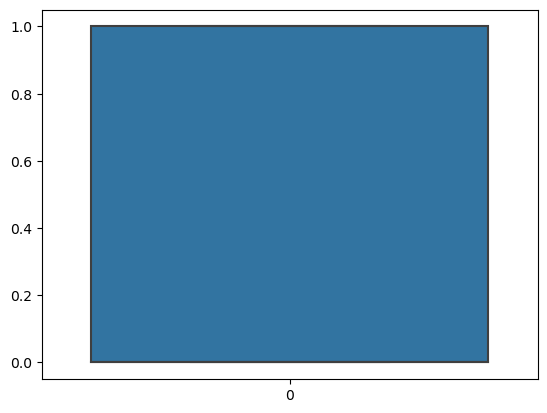

In [ ]:
sns.boxplot(data=ola['Gender'])

<Axes: >

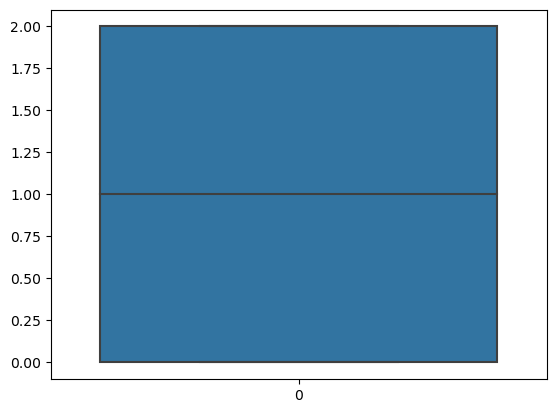

In [ ]:
sns.boxplot(data=ola['Education_Level'])

<Axes: >

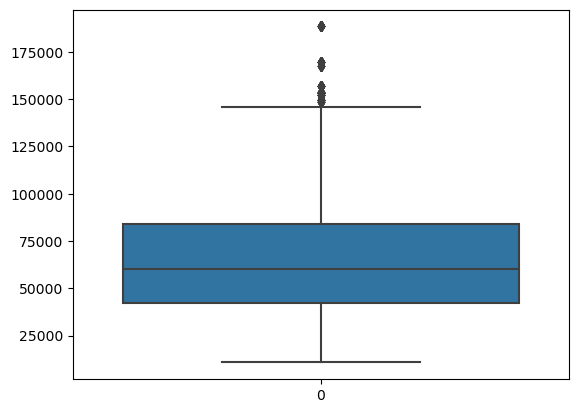

In [ ]:
# income also has outliers
sns.boxplot(data=ola['Income'])

<Axes: >

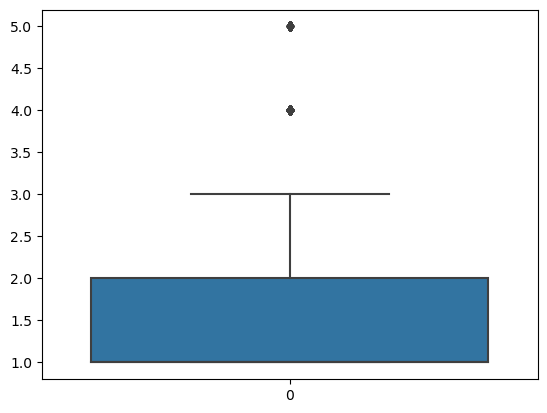

In [ ]:
# outliers present
sns.boxplot(data=ola['Joining Designation'])

<Axes: >

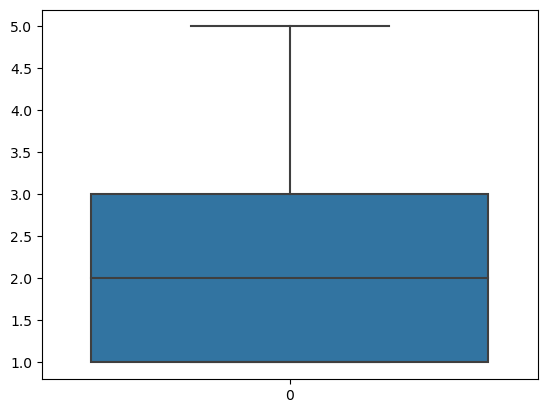

In [ ]:
sns.boxplot(data=ola["Grade"])

<Axes: >

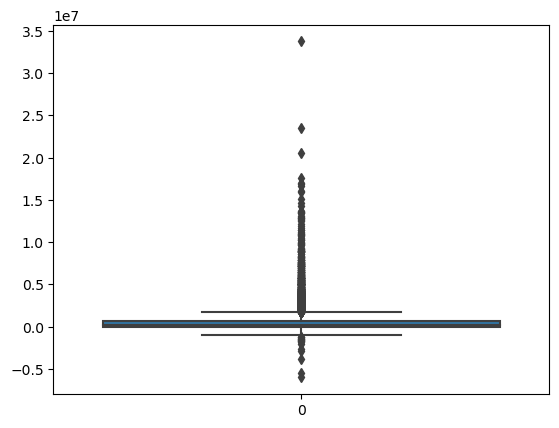

In [ ]:
# outliers present
sns.boxplot(data=ola['Total Business Value'])

<Axes: >

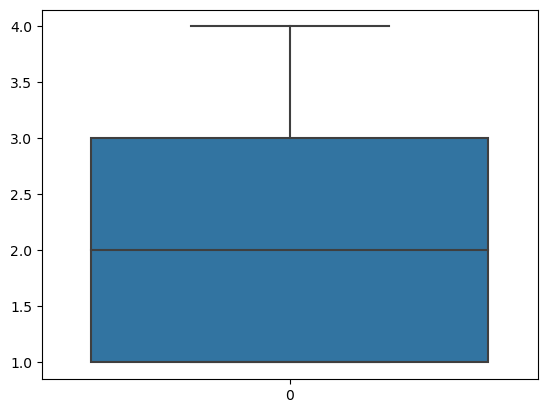

In [ ]:
sns.boxplot(data=ola['Quarterly Rating'])

# Data Preprocessing (50 Points)

### KNN Imputation

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
imputer=KNNImputer(n_neighbors=4)
ola[["Age","Gender"]]=imputer.fit_transform(ola[["Age","Gender"]])

In [ ]:
ola.isna().sum()

Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
ReportingDate               0
dtype: int64

In [ ]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             19104 non-null  int64         
 1   Age                   19104 non-null  float64       
 2   Gender                19104 non-null  float64       
 3   City                  19104 non-null  object        
 4   Education_Level       19104 non-null  int64         
 5   Income                19104 non-null  int64         
 6   Dateofjoining         19104 non-null  datetime64[ns]
 7   LastWorkingDate       1616 non-null   datetime64[ns]
 8   Joining Designation   19104 non-null  int64         
 9   Grade                 19104 non-null  int64         
 10  Total Business Value  19104 non-null  int64         
 11  Quarterly Rating      19104 non-null  int64         
 12  ReportingDate         19104 non-null  datetime64[ns]
dtypes: datetime64[ns

In [ ]:
ola.groupby('Driver_ID').value_counts()

Driver_ID  Age   Gender  City  Education_Level  Income  Dateofjoining  LastWorkingDate  Joining Designation  Grade  Total Business Value  Quarterly Rating  ReportingDate
1          28.0  0.0     C23   2                57387   2018-12-24     2019-03-11       1                    1      0                     2                 2019-03-01       1
4          43.0  0.0     C13   2                65603   2019-12-07     2020-04-27       2                    2      0                     1                 2020-04-01       1
5          29.0  0.0     C9    0                46368   2019-01-09     2019-03-07       1                    1      0                     1                 2019-03-01       1
8          34.0  0.0     C2    0                70656   2020-09-19     2020-11-15       3                    3      0                     1                 2020-11-01       1
12         35.0  0.0     C23   2                28116   2019-06-29     2019-12-21       1                    1      0             

In [ ]:
ola['Driver_ID'].value_counts()

2110    24
2617    24
1623    24
1642    24
1644    24
        ..
1614     1
445      1
2397     1
1619     1
469      1
Name: Driver_ID, Length: 2381, dtype: int64

In [ ]:
driverID=set(ola["Driver_ID"])

In [ ]:
print(ola[ola["Driver_ID"]==2110].sort_values("ReportingDate"))

       Driver_ID   Age  Gender City  Education_Level  Income Dateofjoining  \
14143       2110  36.0     0.0  C19                0  131847    2016-01-21   
14144       2110  36.0     0.0  C19                0  131847    2016-01-21   
14145       2110  37.0     0.0  C19                0  131847    2016-01-21   
14146       2110  37.0     0.0  C19                0  131847    2016-01-21   
14147       2110  37.0     0.0  C19                0  131847    2016-01-21   
14148       2110  37.0     0.0  C19                0  131847    2016-01-21   
14149       2110  37.0     0.0  C19                0  131847    2016-01-21   
14150       2110  37.0     0.0  C19                0  131847    2016-01-21   
14151       2110  37.0     0.0  C19                0  131847    2016-01-21   
14152       2110  37.0     0.0  C19                0  131847    2016-01-21   
14153       2110  37.0     0.0  C19                0  131847    2016-01-21   
14154       2110  37.0     0.0  C19                0  131847    

In [ ]:
ola.ReportingDate.iloc[0:]

0       2019-01-01
1       2019-02-01
2       2019-03-01
3       2020-11-01
4       2020-12-01
           ...    
19099   2020-08-01
19100   2020-09-01
19101   2020-10-01
19102   2020-11-01
19103   2020-12-01
Name: ReportingDate, Length: 19104, dtype: datetime64[ns]

### FeatureEngineering

In [ ]:
ola["quarter"]=ola["ReportingDate"].dt.to_period('Q')

In [ ]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             19104 non-null  int64         
 1   Age                   19104 non-null  float64       
 2   Gender                19104 non-null  float64       
 3   City                  19104 non-null  object        
 4   Education_Level       19104 non-null  int64         
 5   Income                19104 non-null  int64         
 6   Dateofjoining         19104 non-null  datetime64[ns]
 7   LastWorkingDate       1616 non-null   datetime64[ns]
 8   Joining Designation   19104 non-null  int64         
 9   Grade                 19104 non-null  int64         
 10  Total Business Value  19104 non-null  int64         
 11  Quarterly Rating      19104 non-null  int64         
 12  ReportingDate         19104 non-null  datetime64[ns]
 13  quarter         

In [ ]:
ola.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingDate,quarter
0,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,2019-01-01,2019Q1
1,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2019-02-01,2019Q1
2,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,2019-03-01,2019Q1
3,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,2020-11-01,2020Q4
4,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,2020-12-01,2020Q4


In [ ]:
ola["QuarterYear"]=pd.DatetimeIndex(ola["ReportingDate"]).year

In [ ]:
ola.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingDate,quarter,QuarterYear
0,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,2019-01-01,2019Q1,2019
1,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2019-02-01,2019Q1,2019
2,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,2019-03-01,2019Q1,2019
3,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,2020-11-01,2020Q4,2020
4,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,2020-12-01,2020Q4,2020


In [ ]:
ola["quarter"]=ola["quarter"].astype(str)

In [ ]:
for i in range(ola.shape[0]):
    ola["quarter"][i]=(ola["quarter"][i])[-1]

C:\Users\debad\AppData\Local\Temp\ipykernel_5384\1448831963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ola["quarter"][i]=(ola["quarter"][i])[-1]


In [ ]:
ola["quarter"].nunique()

4

In [ ]:
ola["quarter"]=ola["quarter"].astype(int)

In [ ]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             19104 non-null  int64         
 1   Age                   19104 non-null  float64       
 2   Gender                19104 non-null  float64       
 3   City                  19104 non-null  object        
 4   Education_Level       19104 non-null  int64         
 5   Income                19104 non-null  int64         
 6   Dateofjoining         19104 non-null  datetime64[ns]
 7   LastWorkingDate       1616 non-null   datetime64[ns]
 8   Joining Designation   19104 non-null  int64         
 9   Grade                 19104 non-null  int64         
 10  Total Business Value  19104 non-null  int64         
 11  Quarterly Rating      19104 non-null  int64         
 12  ReportingDate         19104 non-null  datetime64[ns]
 13  quarter         

In [ ]:
ola["LastWorkingDate"]=ola["LastWorkingDate"].replace(np.nan,0.0)

In [ ]:
ola["Target"]=0

In [ ]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             19104 non-null  int64         
 1   Age                   19104 non-null  float64       
 2   Gender                19104 non-null  float64       
 3   City                  19104 non-null  object        
 4   Education_Level       19104 non-null  int64         
 5   Income                19104 non-null  int64         
 6   Dateofjoining         19104 non-null  datetime64[ns]
 7   LastWorkingDate       19104 non-null  object        
 8   Joining Designation   19104 non-null  int64         
 9   Grade                 19104 non-null  int64         
 10  Total Business Value  19104 non-null  int64         
 11  Quarterly Rating      19104 non-null  int64         
 12  ReportingDate         19104 non-null  datetime64[ns]
 13  quarter         

In [ ]:
lwd=ola[ola["LastWorkingDate"]!=0.0]
lwd


,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingDate,quarter,QuarterYear,Target
2,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11 00:00:00,1,1,0,2,2019-03-01,1,2019,0
9,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27 00:00:00,2,2,0,1,2020-04-01,2,2020,0
12,5,29.0,0.0,C9,0,46368,2019-01-09,2019-03-07 00:00:00,1,1,0,1,2019-03-01,1,2019,0
20,8,34.0,0.0,C2,0,70656,2020-09-19,2020-11-15 00:00:00,3,3,0,1,2020-11-01,4,2020,0
27,12,35.0,0.0,C23,2,28116,2019-06-29,2019-12-21 00:00:00,1,1,0,1,2019-12-01,4,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19039,2779,28.0,0.0,C26,0,95133,2020-01-26,2020-02-14 00:00:00,3,3,0,1,2020-02-01,1,2020,0
19054,2782,26.0,0.0,C19,1,29582,2019-05-16,2019-08-16 00:00:00,1,1,0,1,2019-08-01,3,2019,0
19081,2785,34.0,1.0,C9,0,12105,2020-08-28,2020-10-28 00:00:00,1,1,0,1,2020-10-01,4,2020,0
19090,2786,45.0,0.0,C19,0,35370,2018-07-31,2019-09-22 00:00:00,2,2,0,1,2019-09-01,3,2019,0


In [ ]:
for i in range(lwd.shape[0]):
    a=lwd["Driver_ID"].iloc[i]
    for j in range(ola.shape[0]):
        if ola["Driver_ID"].iloc[j]==a:
            ola["Target"][j]=1

C:\Users\debad\AppData\Local\Temp\ipykernel_5384\3598896938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ola["Target"][j]=1


In [ ]:
ola

,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,ReportingDate,quarter,QuarterYear,Target
0,1,28.0,0.0,C23,2,57387,2018-12-24,0.0,1,1,2381060,2,2019-01-01,1,2019,1
1,1,28.0,0.0,C23,2,57387,2018-12-24,0.0,1,1,-665480,2,2019-02-01,1,2019,1
2,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11 00:00:00,1,1,0,2,2019-03-01,1,2019,1
3,2,31.0,0.0,C7,2,67016,2020-11-06,0.0,2,2,0,1,2020-11-01,4,2020,0
4,2,31.0,0.0,C7,2,67016,2020-11-06,0.0,2,2,0,1,2020-12-01,4,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788,30.0,0.0,C27,2,70254,2020-06-08,0.0,2,2,740280,3,2020-08-01,3,2020,0
19100,2788,30.0,0.0,C27,2,70254,2020-06-08,0.0,2,2,448370,3,2020-09-01,3,2020,0
19101,2788,30.0,0.0,C27,2,70254,2020-06-08,0.0,2,2,0,2,2020-10-01,4,2020,0
19102,2788,30.0,0.0,C27,2,70254,2020-06-08,0.0,2,2,200420,2,2020-11-01,4,2020,0


In [ ]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             19104 non-null  int64         
 1   Age                   19104 non-null  float64       
 2   Gender                19104 non-null  float64       
 3   City                  19104 non-null  object        
 4   Education_Level       19104 non-null  int64         
 5   Income                19104 non-null  int64         
 6   Dateofjoining         19104 non-null  datetime64[ns]
 7   LastWorkingDate       19104 non-null  object        
 8   Joining Designation   19104 non-null  int64         
 9   Grade                 19104 non-null  int64         
 10  Total Business Value  19104 non-null  int64         
 11  Quarterly Rating      19104 non-null  int64         
 12  ReportingDate         19104 non-null  datetime64[ns]
 13  quarter         

In [ ]:
ola.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,quarter,QuarterYear,Target
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000,19104.000000,19104.000000,19104.000000
mean,1415.591133,34.656669,0.419088,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899,2.477178,2019.491834,0.542242
std,810.705321,6.251751,0.493280,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832,1.131931,0.499946,0.498225
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000,1.000000,2019.000000,0.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,2019.000000,0.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000,2.000000,2019.000000,1.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000,3.000000,2020.000000,1.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000,4.000000,2020.000000,1.000000


## Handeling Imbalance data

In [ ]:
ola["Target"].value_counts()

1    10359
0     8745
Name: Target, dtype: int64

In [ ]:
!pip install imblearn

In [ ]:
leftComp=ola[ola["Target"]==1]
stayComp=ola[ola["Target"]==0]

In [ ]:
print(leftComp.shape)
print(stayComp.shape)

(10359, 16)
(8745, 16)


In [ ]:
from sklearn.utils import resample


In [ ]:
stay_upsample = resample(stayComp,
             replace=True,
             n_samples=len(leftComp),
             random_state=42)

print(stay_upsample.shape)

(10359, 16)


In [ ]:
stay_upsample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10359 entries, 15810 to 10534
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             10359 non-null  int64         
 1   Age                   10359 non-null  float64       
 2   Gender                10359 non-null  float64       
 3   City                  10359 non-null  object        
 4   Education_Level       10359 non-null  int64         
 5   Income                10359 non-null  int64         
 6   Dateofjoining         10359 non-null  datetime64[ns]
 7   LastWorkingDate       10359 non-null  object        
 8   Joining Designation   10359 non-null  int64         
 9   Grade                 10359 non-null  int64         
 10  Total Business Value  10359 non-null  int64         
 11  Quarterly Rating      10359 non-null  int64         
 12  ReportingDate         10359 non-null  datetime64[ns]
 13  quarter     

In [ ]:
ola_updated=stay_upsample.append(leftComp)

C:\Users\debad\AppData\Local\Temp\ipykernel_5384\2042129254.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ola_updated=stay_upsample.append(leftComp)


In [ ]:
ola_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20718 entries, 15810 to 19096
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             20718 non-null  int64         
 1   Age                   20718 non-null  float64       
 2   Gender                20718 non-null  float64       
 3   City                  20718 non-null  object        
 4   Education_Level       20718 non-null  int64         
 5   Income                20718 non-null  int64         
 6   Dateofjoining         20718 non-null  datetime64[ns]
 7   LastWorkingDate       20718 non-null  object        
 8   Joining Designation   20718 non-null  int64         
 9   Grade                 20718 non-null  int64         
 10  Total Business Value  20718 non-null  int64         
 11  Quarterly Rating      20718 non-null  int64         
 12  ReportingDate         20718 non-null  datetime64[ns]
 13  quarter     

In [ ]:
ola_updated.nunique()

Driver_ID               2347
Age                       37
Gender                     5
City                      29
Education_Level            3
Income                  2350
Dateofjoining            863
LastWorkingDate          494
Joining Designation        5
Grade                      5
Total Business Value    8434
Quarterly Rating           4
ReportingDate             24
quarter                    4
QuarterYear                2
Target                     2
dtype: int64

In [ ]:
ola_updated["Target"].value_counts()

0    10359
1    10359
Name: Target, dtype: int64

In [ ]:
from sklearn.preprocessing import TargetEncoder

In [ ]:
ola["City"].value_counts()

C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: City, dtype: int64

In [ ]:
for i in range(ola.shape[0]):
    ola["City"][i]=(ola["City"][i])[1:]


C:\Users\debad\AppData\Local\Temp\ipykernel_5384\3476031395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ola["City"][i]=(ola["City"][i])[1:]


In [ ]:
ola["City"]=ola["City"].astype(int)

In [ ]:
ola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             19104 non-null  int64         
 1   Age                   19104 non-null  float64       
 2   Gender                19104 non-null  float64       
 3   City                  19104 non-null  int32         
 4   Education_Level       19104 non-null  int64         
 5   Income                19104 non-null  int64         
 6   Dateofjoining         19104 non-null  datetime64[ns]
 7   LastWorkingDate       19104 non-null  object        
 8   Joining Designation   19104 non-null  int64         
 9   Grade                 19104 non-null  int64         
 10  Total Business Value  19104 non-null  int64         
 11  Quarterly Rating      19104 non-null  int64         
 12  ReportingDate         19104 non-null  datetime64[ns]
 13  quarter         

# Model building

In [ ]:
ola.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Dateofjoining', 'LastWorkingDate', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating', 'ReportingDate', 'quarter',
       'QuarterYear', 'Target'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = ola[['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income', 'Joining Designation', 'Grade','Total Business Value', 'Quarterly Rating', 'quarter','QuarterYear']]
y = ola["Target"]


In [ ]:
print(X.shape)
print(y.shape)

(19104, 12)
(19104,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=7, max_depth=4)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=7)

In [ ]:
print("Train accuracy: {:.2f}".format(tree_clf.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(tree_clf.score(X_test, y_test)*100))

Train accuracy: 75.99
Test accuracy: 74.39


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)

In [ ]:
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 75.97 
 Validation: 74.61
K-Fold Accuracy Std: 
 Train: 0.20, 
 Validation: 2.13


In [ ]:
params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

In [ ]:
grid.fit(X, y)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 9, 'n_estimators': 200}
Best score:  0.7529836683417086


In [ ]:
clf2 = RandomForestClassifier(random_state=7, bootstrap=True, criterion='gini',
                              max_depth=5, max_features=8, n_estimators=100)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(clf2, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.3f} \n Validation: {cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.3f}, \n Validation: {cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train: 77.281 
 Validation: 75.785
K-Fold Accuracy Std: 
 Train: 0.324, 
 Validation: 1.767


In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
bagging = BaggingClassifier(base_estimator=rf, n_estimators=10, random_state=42)
# Train the bagging classifier
bagging.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = bagging.predict(X_test)
# Evaluate the accuracy of the bagging classifier
accuracy = bagging.score(X_test, y_test)
print("Accuracy:", accuracy)

C:\Users\debad\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.927599441730635


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
# Train the classifier
gb.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = gb.predict(X_test)
# Evaluate the accuracy of the classifier
accuracy = gb.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8044312630844382


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[1,2,3,4],"n_estimators":[5,10,15,20] }
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5,  scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [5, 10, 15, 20]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']

In [ ]:
print('Best score: ',clf.best_score_)
print('Best Hyper parameters: ',clf.best_params_)

Best score:  0.8563597513343553
Best Hyper parameters:  {'max_depth': 4, 'n_estimators': 20}


In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

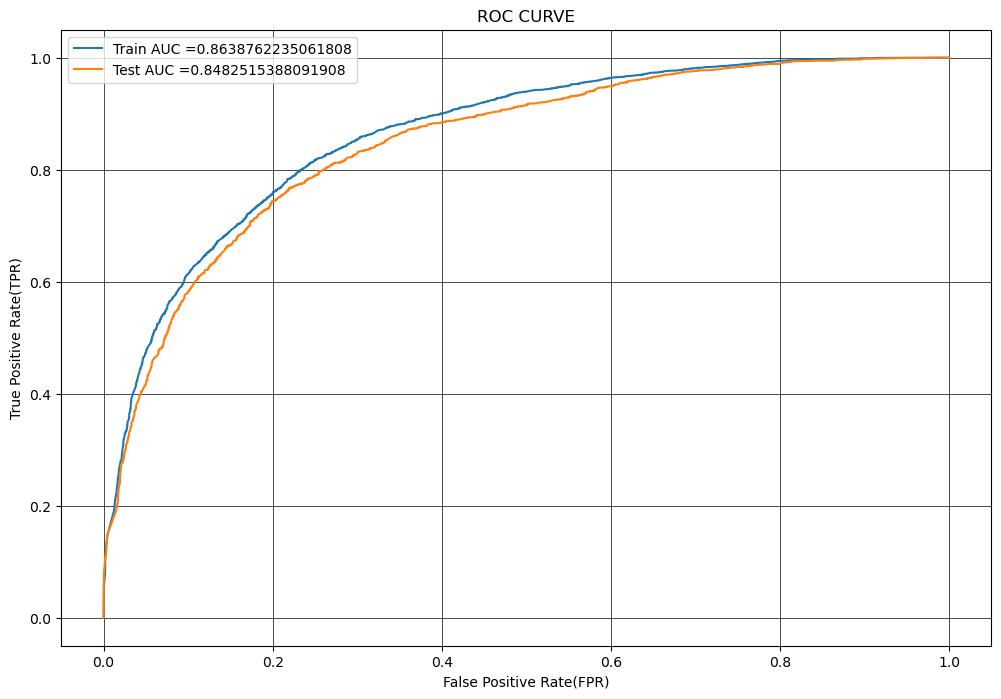

In [ ]:
model_set1=GradientBoostingClassifier(max_depth = clf.best_params_["max_depth"], n_estimators= clf.best_params_["n_estimators"])
model_set1.fit(X_train, y_train)
y_train_probs = clf.predict_proba(X_train)[:,1] # converting train and test output into probability
y_test_probs= clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) # storing values of fpr and tpr
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)

plt.figure(figsize=(12,8))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC CURVE")
plt.grid(color='black',lw=0.5)

In [ ]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.6140792807114751 for threshold 0.495
CONFUSION MATRIX OF TRAIN DATA


[[4611 1485]
 [1369 5907]]


Text(0.5, 1.0, 'Train Data Confusion Matrix')

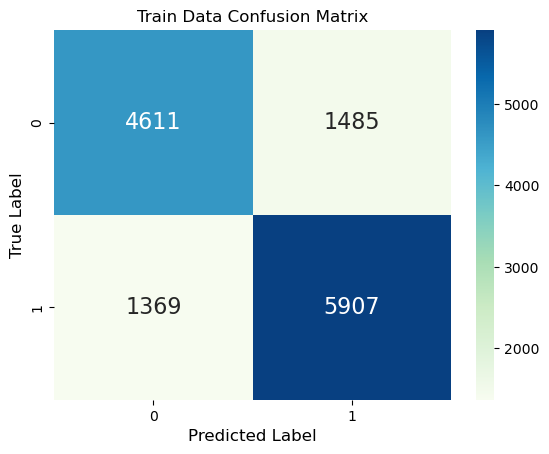

In [ ]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm=metrics.confusion_matrix(y_train,predict_with_best_t(y_train_probs, best_t))  # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("CONFUSION MATRIX OF TRAIN DATA")
print("\n")
print(cm)
sns.heatmap(cm, annot=True, fmt='d',cmap='GnBu',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Train Data Confusion Matrix',size=12)


In [ ]:
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm=metrics.confusion_matrix(y_test,predict_with_best_t(y_test_probs, best_t))

print("CONFUSION MATRIX OF TEST DATA")
print('\n')
print(cm)
sns.heatmap(cm, annot=True, fmt='d',cmap='GnBu',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Test Data Confusion Matrix',size=12)

the maximum value of tpr*(1-fpr) 0.5991508126678199 for threshold 0.526
CONFUSION MATRIX OF TEST DATA


[[2069  580]
 [ 718 2365]]


Text(0.5, 1.0, 'Test Data Confusion Matrix')